In [1]:
import pandas as pd


In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('train.csv')

In [4]:
col_list=list(data)

In [5]:
data.dropna(
    axis=0,
    how='any',
    thresh=None,
    subset=None,
    inplace=True
)

In [6]:
from sklearn.model_selection import train_test_split

In [8]:
uni_lc_lis=data['Loyalty_customer'].unique()

In [9]:
uni_dic=dict(zip(uni_lc_lis, range(len(uni_lc_lis))))

In [10]:
data.replace({'Loyalty_customer':uni_dic},inplace=True)

In [12]:
uni_pc_dic=data['Product_Category'].unique()

In [13]:
uni_pc_dic=dict(zip(uni_pc_lis,range(len(uni_pc_lis))))

In [14]:
data.replace({'Product_Category':uni_pc_dic},inplace=True)

In [15]:
data.drop(['Customer_name'],axis=1,inplace=True)

In [17]:
data.drop(['Product_id'],axis=1,inplace=True)

In [19]:
data.drop(['instock_date'],axis=1,inplace=True)

In [21]:
data.drop( data[ data['Selling_Price']<0].index , inplace=True)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5386 entries, 0 to 6367
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Stall_no          5386 non-null   float64
 1   Market_Category   5386 non-null   int64  
 2   Loyalty_customer  5386 non-null   int64  
 3   Product_Category  5386 non-null   int64  
 4   Grade             5386 non-null   int64  
 5   Demand            5386 non-null   int64  
 6   Discount_avail    5386 non-null   float64
 7   charges_1         5386 non-null   float64
 8   charges_2 (%)     5386 non-null   float64
 9   Minimum_price     5386 non-null   float64
 10  Maximum_price     5386 non-null   float64
 11  Selling_Price     5386 non-null   float64
dtypes: float64(7), int64(5)
memory usage: 547.0 KB


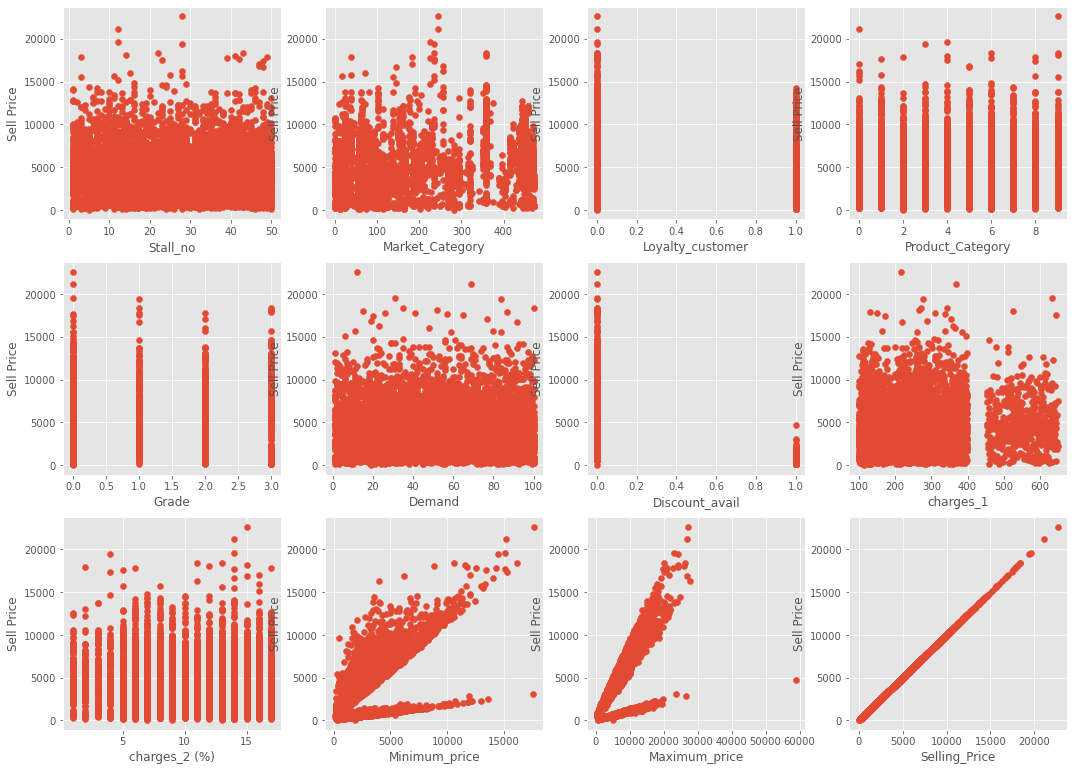

In [25]:
plt.style.use('ggplot') 
fig = plt.figure(figsize = (18, 18)) 
for i in range(len(col_list)):
    ax = fig.add_subplot(4, 4, i + 1) 
    ax.scatter(data[col_list[i]],data['Selling_Price']) 
    ax.set_ylabel('Sell Price', size = 12) 
    ax.set_xlabel(col_list[i], size = 12) 

In [24]:
col_list=list(data)

In [27]:
from scipy.stats import chi2_contingency

In [43]:
data_crosstab = pd.crosstab(data['Stall_no'], 
                            data['Selling_Price'],  
                               margins = False) 

In [30]:
chi_scores_sn=chi2_contingency(data_crosstab_sn)

In [39]:
t=[]

In [35]:
p.append(chi_scores_sn[1])

In [44]:
for i in range(len(col_list)-1):
    del data_crosstab
    data_crosstab = pd.crosstab(data[col_list[i]], 
                            data['Selling_Price'],  
                               margins = False) 
    chi_scores_sn=chi2_contingency(data_crosstab)
    t.append(chi_scores_sn[1])
    
    

In [45]:
print(t)

[0.47457841889757096, 0.5109187192564442, 0.48590727425904084, 0.489473396173171, 0.48647015199773275, 0.4574116506424131, 0.48590727425904084, 0.42020223939890355, 0.4665719147001594, 0.2323055601753108, 0.2894901578400579]


In [46]:
print(col_list)

['Stall_no', 'Market_Category', 'Loyalty_customer', 'Product_Category', 'Grade', 'Demand', 'Discount_avail', 'charges_1', 'charges_2 (%)', 'Minimum_price', 'Maximum_price', 'Selling_Price']


In [49]:
val=data.values

In [50]:
x=val[:,:-1]

In [51]:
y=val[:,-1]

In [54]:
from sklearn.ensemble import RandomForestRegressor 
  
 # create regressor object 
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(x, y) 

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [55]:
test=pd.read_csv('test.csv')

In [56]:
test.drop(['instock_date'],axis=1,inplace=True)

In [57]:
test.drop(['Customer_name'],axis=1,inplace=True)

In [58]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3430 entries, 0 to 3429
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Product_id        3430 non-null   object
 1   Stall_no          3430 non-null   int64 
 2   Market_Category   3430 non-null   int64 
 3   Loyalty_customer  3430 non-null   object
 4   Product_Category  3430 non-null   object
 5   Grade             3430 non-null   int64 
 6   Demand            3430 non-null   int64 
 7   Discount_avail    3430 non-null   int64 
 8   charges_1         3430 non-null   int64 
 9   charges_2 (%)     3430 non-null   int64 
 10  Minimum_price     3430 non-null   int64 
 11  Maximum_price     3430 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 321.7+ KB


In [59]:
test.replace({'Product_Category':uni_pc_dic},inplace=True)

In [60]:
test.replace({'Loyalty_customer':uni_dic},inplace=True)

In [61]:
test_val=test.values

In [62]:
z=test_val[:,1:]

In [63]:
z_pred=regressor.predict(z)

In [64]:
output=pd.DataFrame(data={"Product_id":test['Product_id'],"Selling_Price":z_pred})

In [65]:
output.to_csv('Final_Submission.csv')

0.47457841889757096